# Website Traffic Forecasting using Python

In [3]:
#Import datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

data = pd.read_csv("Thecleverprogrammer.csv")
print(data.head())


         Date  Views
0  01/06/2021   7831
1  02/06/2021   7798
2  03/06/2021   7401
3  04/06/2021   7054
4  05/06/2021   7973


The dataset contains two columns, date and traffic. Before moving forward, I will convert the Date column into Datetime data type

In [4]:
data['Date'] = pd.to_datetime(data['Date'], format="%d/%m/%Y")
data.head(3)

,Date,Views
0,2021-06-01,7831
1,2021-06-02,7798
2,2021-06-03,7401


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB
None


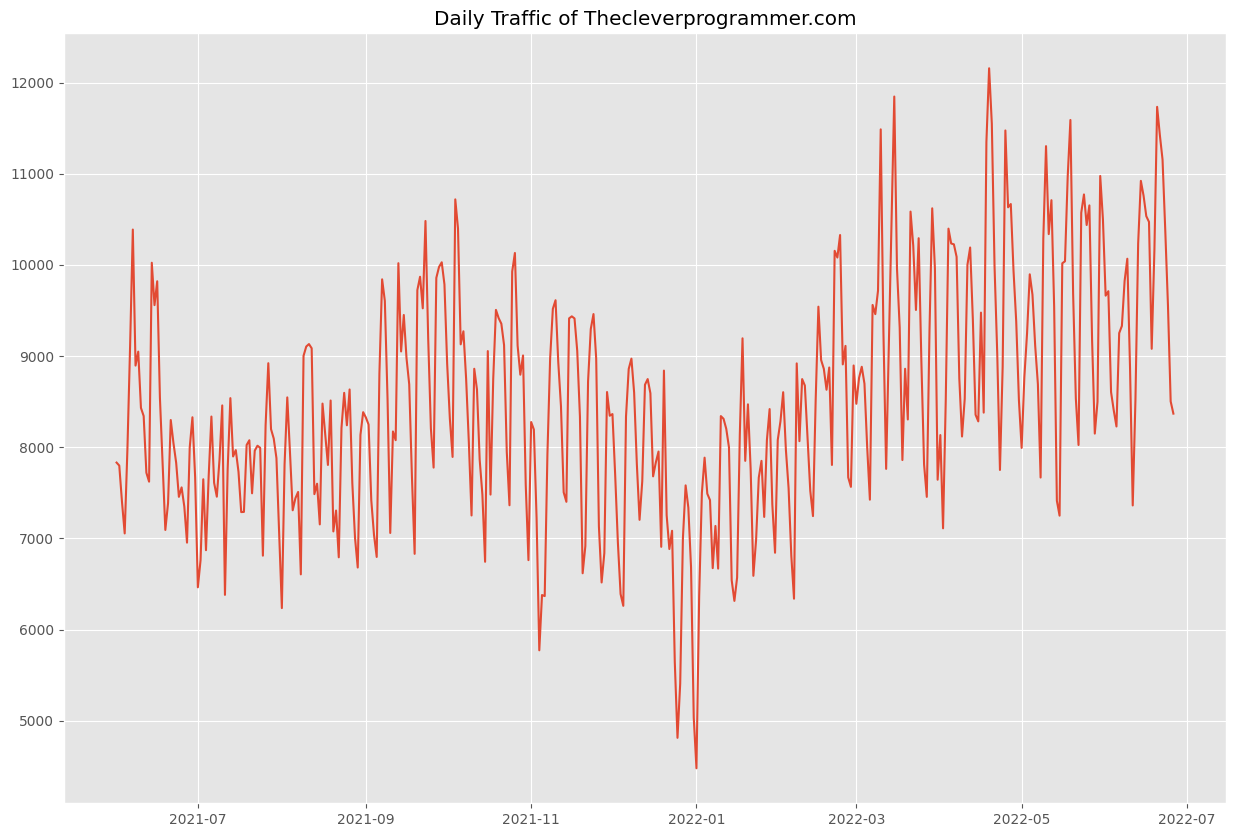

In [6]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Views"])
plt.title("Daily Traffic of Thecleverprogrammer.com")
plt.show()

Our website traffic data is seasonal because the traffic on the website increases during the weekdays and decreases during the weekends. It is valuable to know if the dataset is seasonal or not while working on the problem of Time Series Forecasting. Below is how we can have a look at whether our dataset is stationary or seasonal:

<Figure size 640x480 with 0 Axes>

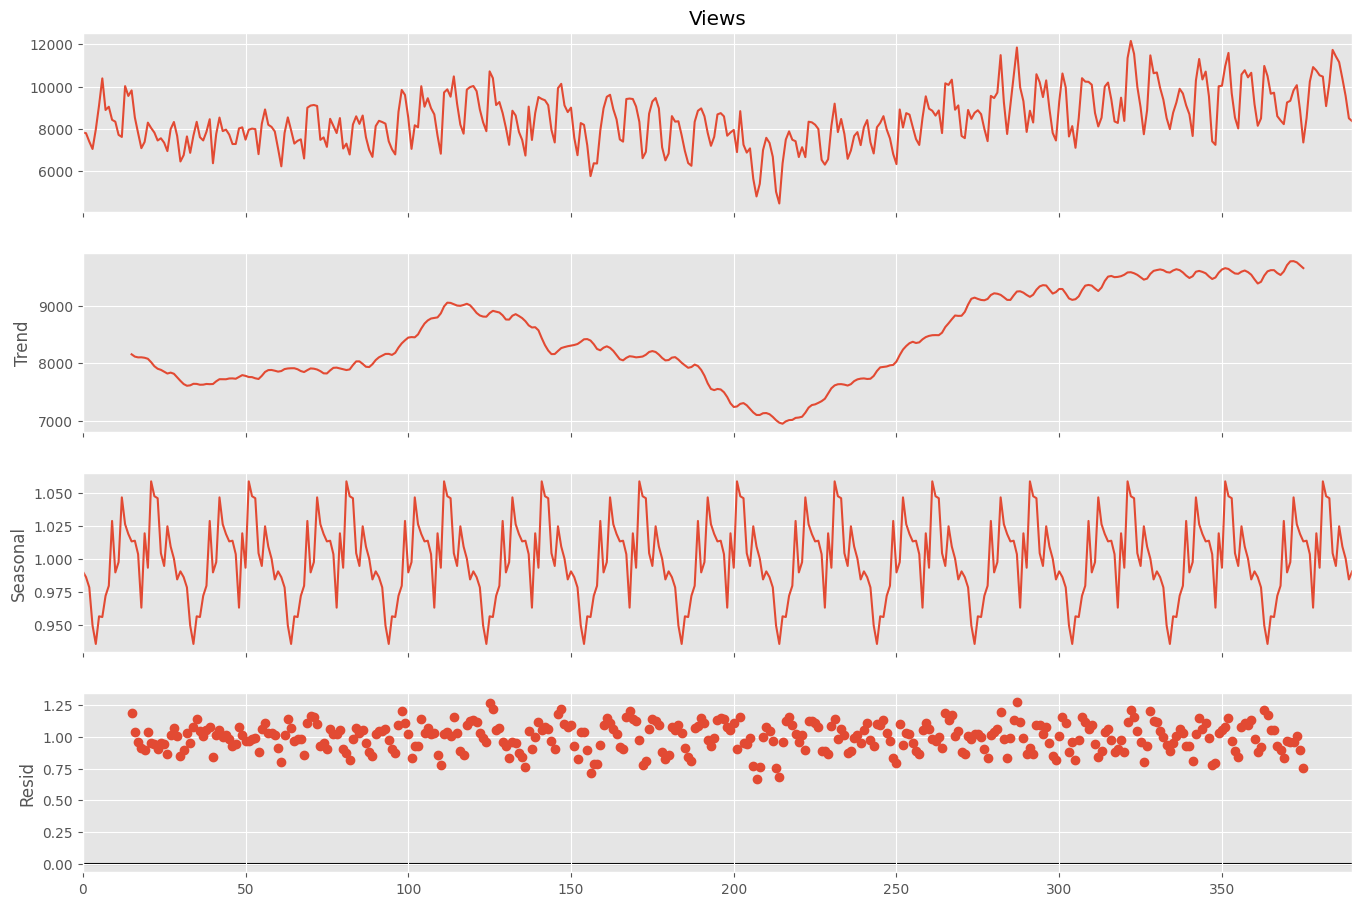

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data["Views"], model='multiplicative',period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

I will be using the Seasonal ARIMA (SARIMA) model to forecast traffic on the website. Before using the SARIMA model, it is necessary to find the p, d, and q values. 

As the data is not stationary, the value of d is 1. To find the values of p and q, we can use the autocorrelation and partial autocorrelation plots:

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

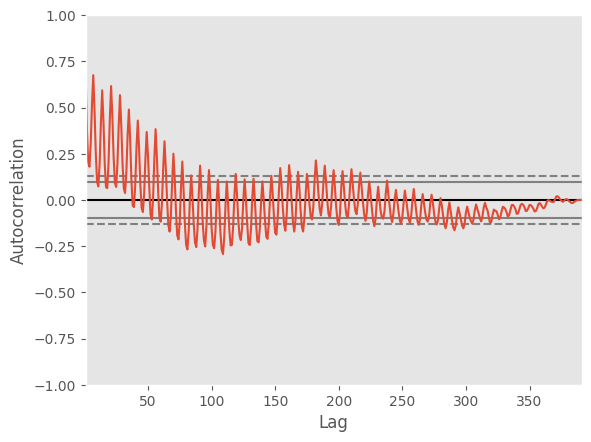

In [16]:
pd.plotting.autocorrelation_plot(data["Views"])

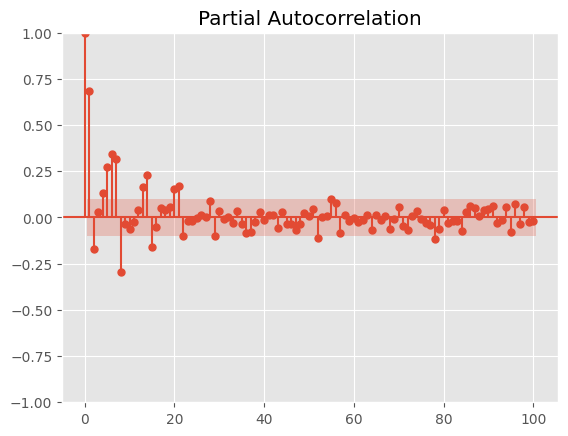

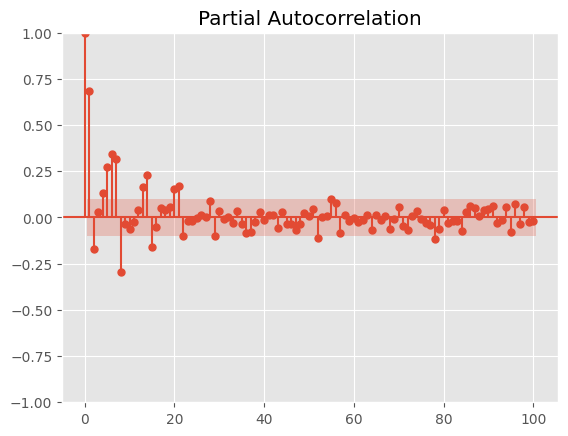

In [17]:
plot_pacf(data["Views"], lags = 100)

Now here’s how we can train a SARIMA model for the task of website traffic forecasting:

In [18]:
p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(data['Views'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

c:\Users\HellenMati\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\HellenMati\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3099.045
Date:                            Mon, 26 Jun 2023   AIC                           6228.090
Time:                                    00:57:12   BIC                           6287.113
Sample:                                         0   HQIC                          6251.515
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7537      0.129      5.864      0.000       0.502       1.006
ar.L2         -0.8038      0.134   

Now let’s forecast traffic on the website for the next 50 days:



In [19]:
predictions = model.predict(len(data), len(data)+50)
print(predictions)

391     9852.200164
392    10837.301039
393    10774.471535
394     9851.430672
395     8906.703609
396     8386.660621
397     8938.609152
398     9714.452812
399    10382.051465
400    10594.421475
401     9863.950828
402     9277.858234
403     8952.250634
404     9027.239890
405    10361.156409
406    10914.859774
407    10836.993262
408    10014.787669
409     9380.495250
410     8581.877063
411     9095.755733
412    10238.368621
413    10643.505710
414    10840.005442
415    10257.190083
416     9408.146474
417     8973.387421
418     9129.821828
419     9955.832151
420    10354.675023
421    10770.656262
422     9937.993016
423     9525.055330
424     8950.352172
425     8842.539179
426    10121.407474
427    10861.902046
428    10912.063657
429    10321.127418
430     9375.915006
431     8641.383606
432     8674.152175
433    10047.462575
434    10545.482182
435    10866.490994
436    10391.617977
437     9320.683770
438     9155.608195
439     9350.131004
440    10277.522556


<AxesSubplot: >

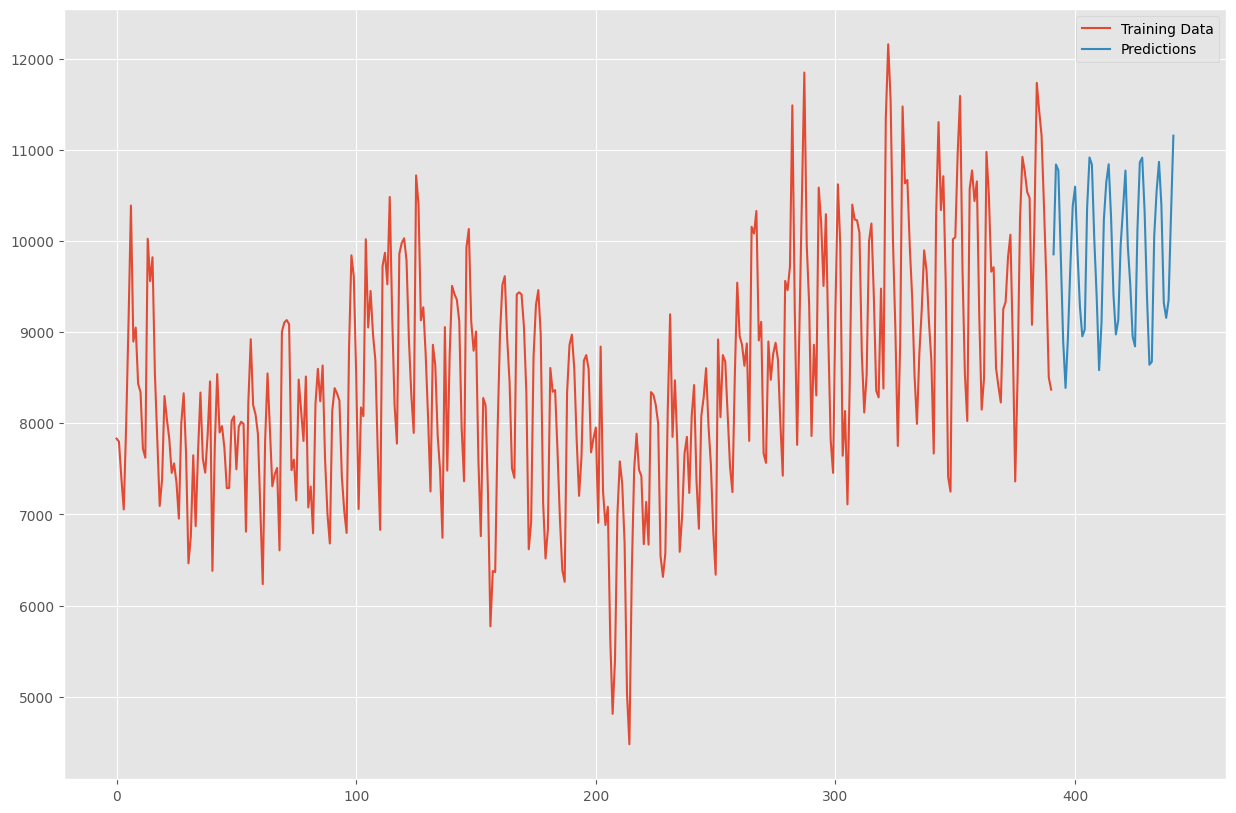

In [20]:
data["Views"].plot(legend=True, label="Training Data", 
                   figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")